### Load Example Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

Visualizing example dataset for outlier detection.




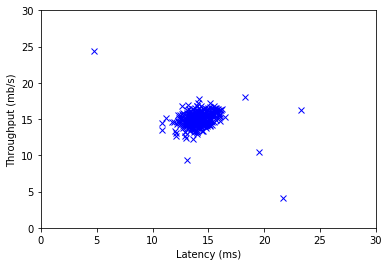

In [115]:
print('Visualizing example dataset for outlier detection.\n\n')

data = loadmat('ex8data1.mat')

X = data['X']
Xval = data['Xval']
yval = data['yval'].ravel()

plt.plot(X[:,0], X[:,1], 'bx')
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

### Estimate the dataset statistics

In [9]:
def estimateGaussian(X):
    [m, n] = X.shape
    
    mu = np.sum(X, 0) / m
    
    sigma2 = np.sum((X - mu) ** 2, 0) /m
    
    return (mu, sigma2)

In [14]:
# https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise8/utils.py

def multivariateGaussian(X, mu, Sigma2):
    k = mu.size

    # if sigma is given as a diagonal, compute the matrix
    if Sigma2.ndim == 1:
        Sigma2 = np.diag(Sigma2)

    X = X - mu
    p = (2 * np.pi) ** (- k / 2) * np.linalg.det(Sigma2) ** (-0.5)\
        * np.exp(-0.5 * np.sum(np.dot(X, np.linalg.pinv(Sigma2)) * X, axis=1))
    return p

In [21]:
# https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise8/utils.py

def visualizeFit(X, mu, sigma2):
    X1, X2 = np.meshgrid(np.arange(0, 35.5, 0.5), np.arange(0, 35.5, 0.5))
    Z = multivariateGaussian(np.stack([X1.ravel(), X2.ravel()], axis=1), mu, sigma2)
    Z = Z.reshape(X1.shape)

    plt.plot(X[:, 0], X[:, 1], 'bx', mec='b', mew=2, ms=8)

    if np.all(abs(Z) != np.inf):
        plt.contour(X1, X2, Z, levels=10**(np.arange(-20., 1, 3)), zorder=100)

Visualizing Gaussian Fit


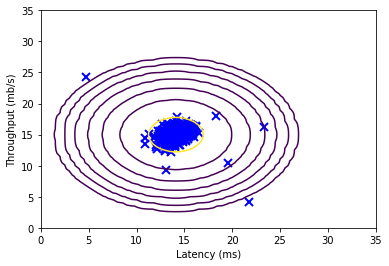

In [22]:
print('Visualizing Gaussian Fit')

[mu, sigma2] = estimateGaussian(X)

p = multivariateGaussian(X, mu, sigma2)

visualizeFit(X, mu, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

### Find Outliers

In [112]:
def selectThreshold(yval, pval):
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
    
    for epsilon in np.linspace(1.01*min(pval), max(pval), 1000):
        tp = np.sum((yval == 1) & (pval < epsilon))
        tn = np.sum((yval == 0) & (pval >= epsilon))
        fp = np.sum((yval == 1) & (pval >= epsilon))
        fn = np.sum((yval == 0) & (pval < epsilon))
        
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)

        F1 = (2 * precision * recall)/(precision + recall)
    
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
            
    return bestEpsilon, bestF1
    
    

Best epsilon found using cross-validation: 8.999852631901395e-05

Best F1 on Cross Validation Set:  0.8750000000000001

   (you should see a value epsilon of about 8.99e-05)

   (you should see a Best F1 value of  0.875000)




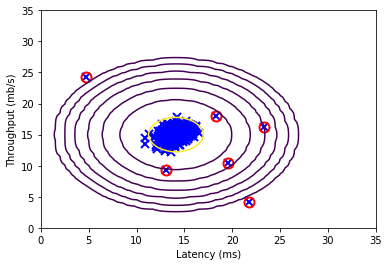

In [121]:
pval = multivariateGaussian(Xval, mu, sigma2)

[epsilon, F1] = selectThreshold(yval, pval)
print(f'Best epsilon found using cross-validation: {epsilon}\n')
print(f'Best F1 on Cross Validation Set:  {F1}\n')
print('   (you should see a value epsilon of about 8.99e-05)\n')
print('   (you should see a Best F1 value of  0.875000)\n\n')

outliers = p < epsilon

visualizeFit(X,  mu, sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

plt.plot(X[outliers, 0], X[outliers, 1], 'ro', ms=10, mfc='None', mew=2)

### Multidimensional Outliers

In [125]:
data2 = loadmat('ex8data2.mat')

X = data2['X']
Xval = data2['Xval']
yval = data2['yval'].ravel()

[mu, sigma2] = estimateGaussian(X)

p = multivariateGaussian(X, mu, sigma2)

pval = multivariateGaussian(Xval, mu, sigma2)

[epsilon, F1] = selectThreshold(yval, pval)

print(f'Best epsilon found using cross-validation: {epsilon}\n')
print(f'Best F1 on Cross Validation Set:  {F1}\n')
print('   (you should see a value epsilon of about 1.38e-18)\n')
print('   (you should see a Best F1 value of 0.615385)\n')
print(f'# Outliers found: {np.sum(p < epsilon)}\n\n')

Best epsilon found using cross-validation: 1.3786074987947638e-18

Best F1 on Cross Validation Set:  0.6153846153846154

   (you should see a value epsilon of about 1.38e-18)

   (you should see a Best F1 value of 0.615385)

# Outliers found: 117


